In [74]:
'''Study of the dynamical system for prey, predator, and super predators detailed in 

MATHEMATICAL MODEL OF THREE SPECIES
FOOD CHAIN INTERACTION WITH MIXED
FUNCTIONAL RESPONSE'''

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

y0 = [0.75,0.15,2] #plants sheep wolves
t_span = [0,500]

par = {"a1":0.5,"a2":0.5,"a3":0.007426,"b1":0.5,"b2":0.5,"c1":0.6,"c2":0.70,"D":10}

def LV_HT(t,y,par):
    X,Y,Z = y
    dX = (par['a1'] - par['b1'] * Y ) * X
    dY = (-par['a2'] + par['b2'] * X - (par['c1'] * Z * Y)/(par['D']**2 + Y**2)) * Y
    dZ = (-par['a3'] + (par['c2'] * Y**2)/(par['D'] ** 2 + Y**2)) * Z

    return np.array([dX,dY,dZ])

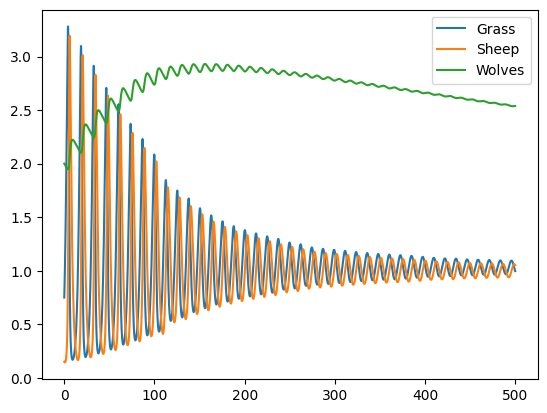

In [75]:
sol = solve_ivp(lambda t,y:LV_HT(t,y,par),y0=y0,t_span=t_span,t_eval=np.linspace(0,500,10000))

labels = ["Grass","Sheep","Wolves"]
for i in range(3):
    plt.plot(np.linspace(0,500,10000),sol.y[i,:],label=labels[i])
plt.legend()




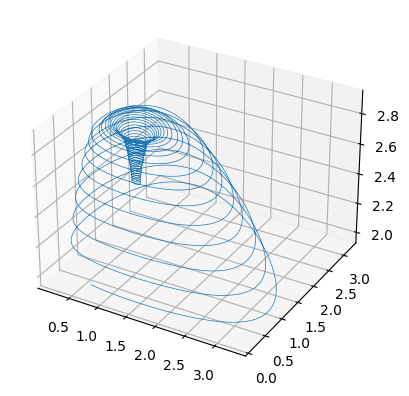

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],linewidth=0.5)